# SVM with Kernels

## Gaussian Kernel (Radial Basis Function (RBF))

In this task, we will make 6 plots and show how the Gaussian Kernel works with different $C$ values: $0.1, 0.5, 1, 2, 10, 100$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid") # Plot style

from sklearn.svm import SVC

%load_ext autoreload
%autoreload 2

In [2]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)

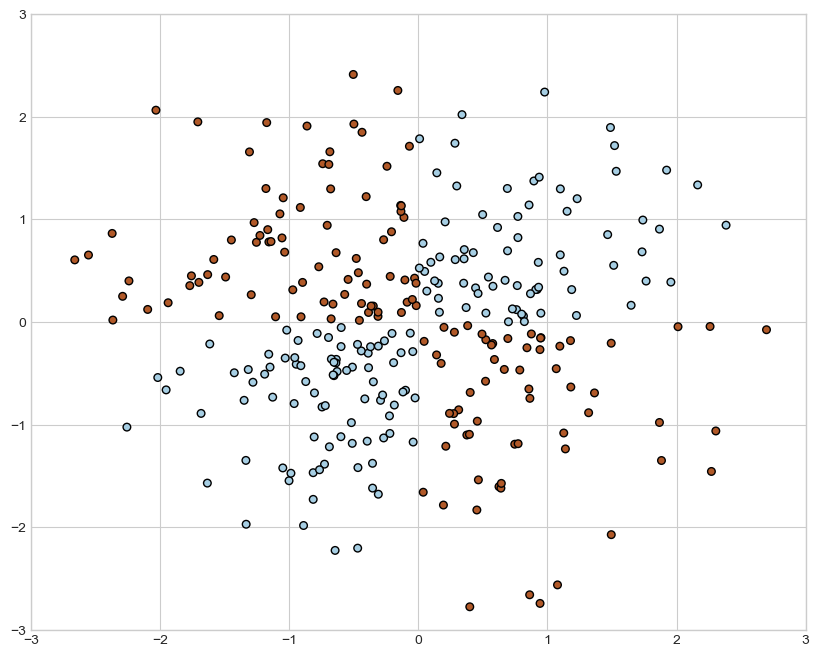

In [3]:
np.random.seed(0)
train_X = np.random.randn(300, 2)
train_Y = np.logical_xor(train_X[:, 0] > 0, train_X[:, 1] > 0) * 1

plt.scatter(train_X[:, 0], train_X[:, 1], s=30, c=train_Y, cmap=plt.cm.Paired, edgecolors='k')
plt.axis([-3, 3, -3, 3])
plt.show()

In [4]:
plt.style.use('default') 

In [5]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))

def plot_svm(model, X, Y, ax = None):
    """
    Plots the decision function for each datapoint on the grid
    """
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    if ax is None:
        plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), 
                   aspect='auto', origin='lower', cmap=plt.cm.PuOr_r)
        contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2)
        plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired, edgecolors='k')
        plt.axis([-3, 3, -3, 3])
        plt.show()
    else:
        ax.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), 
                  aspect='auto', origin='lower', cmap=plt.cm.PuOr_r)
        contours = ax.contour(xx, yy, Z, levels=[0], linewidths=2)
        ax.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired, edgecolors='k')
        ax.axis([-3, 3, -3, 3])

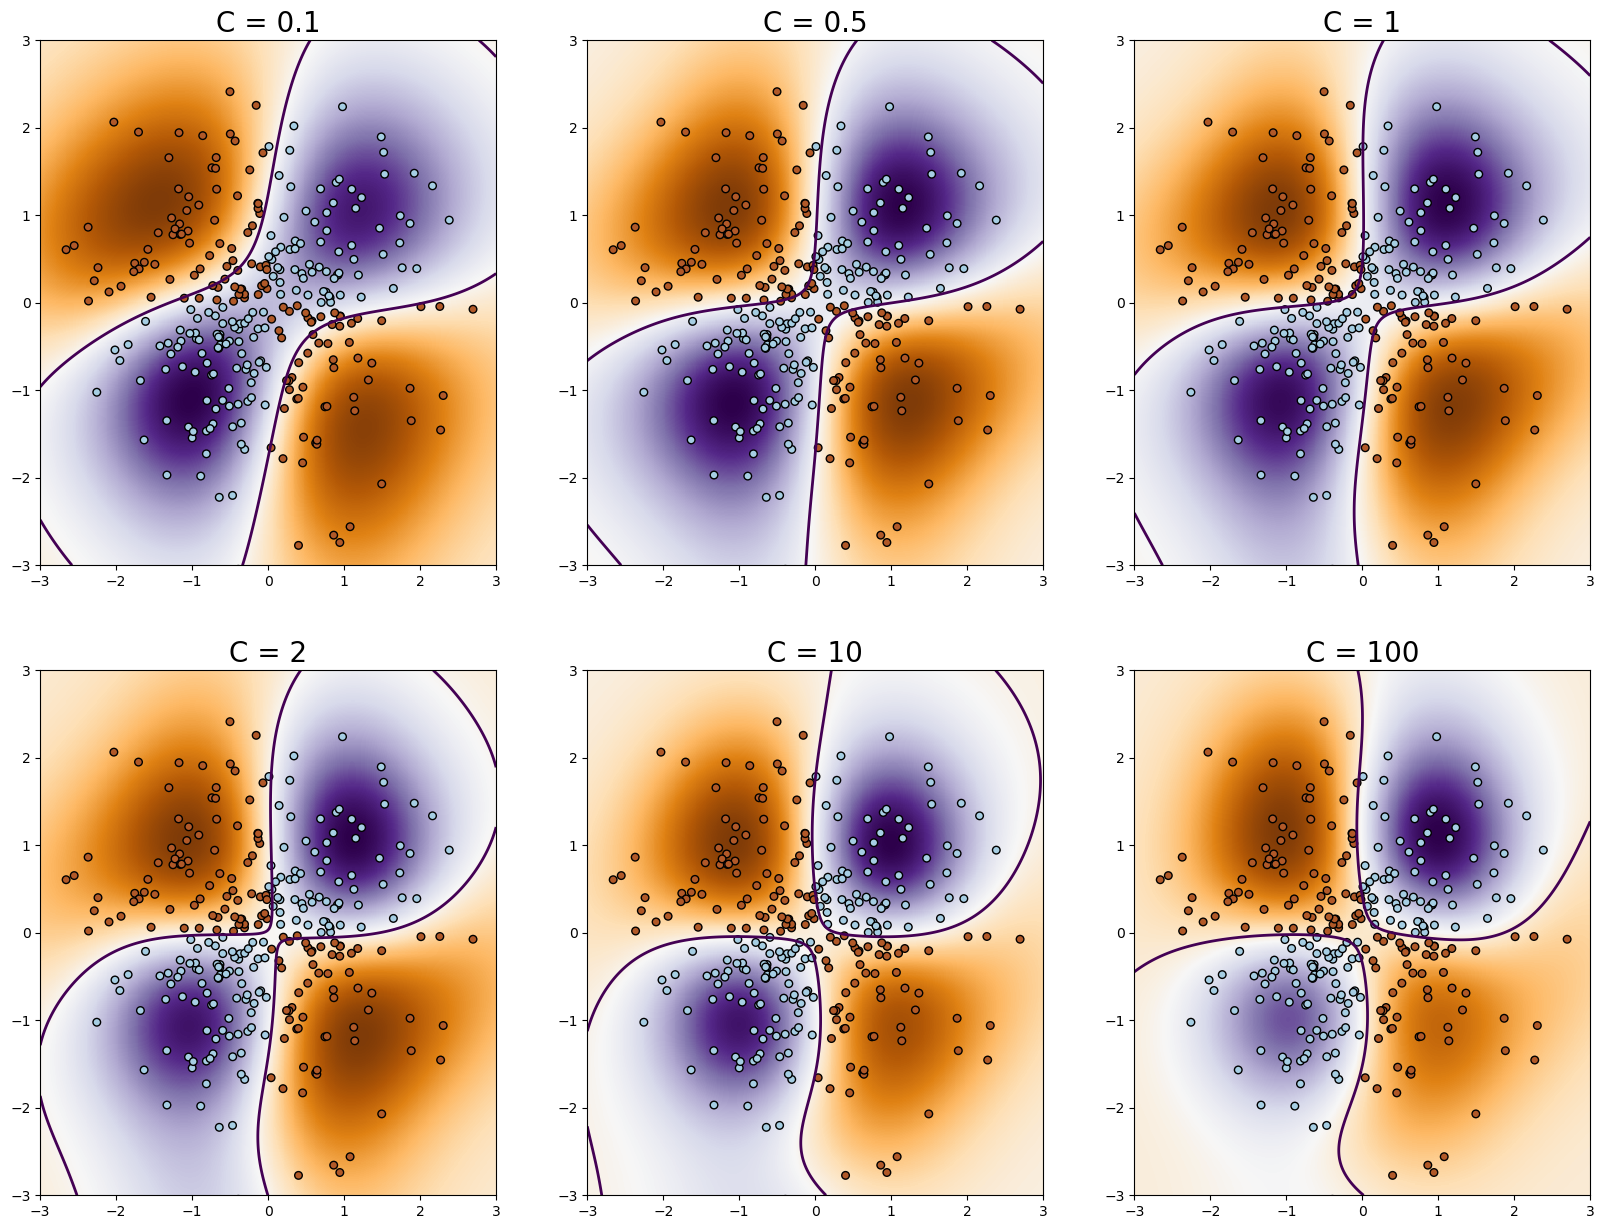

In [6]:
fig, ax = plt.subplots(2, 3, figsize=(20, 15))
    
for i, c in enumerate([0.1, 0.5, 1, 2, 10, 100]):
    svm_model = SVC(kernel="rbf", C=c)
    svm_model.fit(train_X, train_Y)
    ax[i // 3][i if i - 3 < 0 else i - 3].set_title(f'C = {c}', fontsize=20)
    plot_svm(svm_model, train_X, train_Y, ax = ax[i // 3][i if i - 3 < 0 else i - 3])

Lower values of C parameter result in underfitting (i.e. lower accuracy).
Higher values of C parameter result in:
* better classification (i.e. higher accuracy),
* higher overfitting probability.

Optimal value of C parameter must be chosen:
* on validation dataset,
* by Cross-Validation,
* etc.

Now let's change the gamma parameter: $0.01, 0.5, 1, 2, 10, 100$ and do the same as in the previous case.  $\gamma=\frac{1}{2\sigma}$ in the Gaussian Kernel formula.

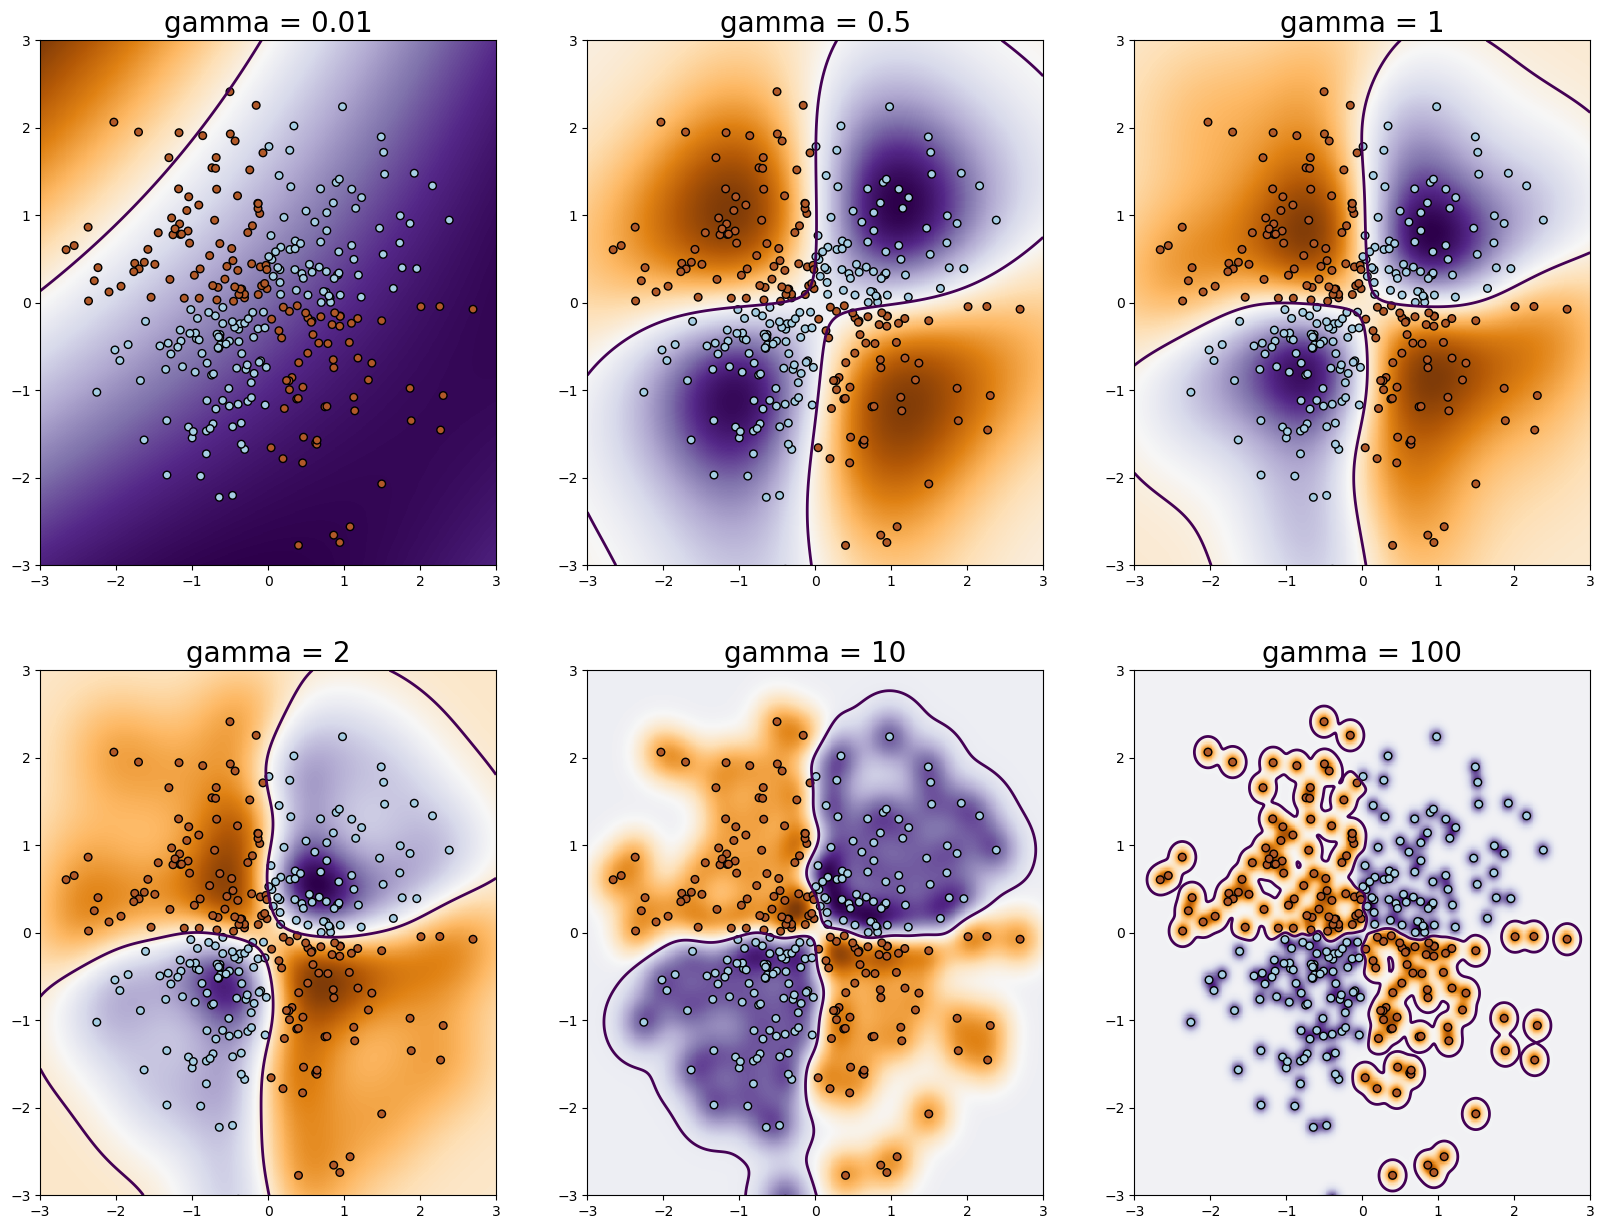

In [7]:
fig, ax = plt.subplots(2, 3, figsize=(20, 15))

for i, c in enumerate([0.01, 0.5, 1, 2, 10, 100]):
    svm_model = SVC(kernel="rbf", gamma=c)
    svm_model.fit(train_X, train_Y)
    ax[i // 3][i if i - 3 < 0 else i - 3].set_title(f'gamma = {c}', fontsize=20)
    plot_svm(svm_model, train_X, train_Y, ax = ax[i // 3][i if i - 3 < 0 else i - 3])

Lower values of gamma parameter result in underfitting (i.e. lower accuracy).
Higher values of gamma parameter result in:
* better classification (i.e. higher accuracy),
* higher overfitting probability.

Optimal value of gamma parameter must be chosen:
* on validation dataset,
* by Cross-Validation,
* etc.